MIS 382N: ADVANCED MACHINE LEARNING

Assignment 4

Total points: 75 + 5 bonus points

Due: Monday, November 2 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

**Name: Disha Gandhi**

EID: dsg2258

**Name: Kshitij Mahajan**

EID:ksm3267

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import scikitplot as skplt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Question 1: Expected Loss Minimization [10 pts]
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & r & c  \\
   & C2 & s & 0 & c \\
  \end{array} } 
$$

where the cost of rejection is a constant, and the costs $r$ and $s$ are positive real numbers. Let $f(x)=P(C1|x)$.


**(a) [2.5 points]** Show that the expected loss when $x$ is labelled as $C_1$ is a decreasing function of $f(x)$ while expected loss when $x$ is labelled as $C_2$ is a increasing function of $f(x)$.  

**(b) [2.5 points]** For $c=0$, show that the decision which minimizes the expected loss is to reject all instances of $x$

**(c) [2.5 points]** Let $r=5$ and $s=2$, what is the minimum value of $c$ such that no instance of $x$ gets rejected (irrespective of  $f(x)$)?

**(d) [2.5 points]** Let $r=7$, $s=4$, and $c=3$. Determine the  ranges of $f(x)$ for which the optimal decision is C1, reject and C2 respectively.

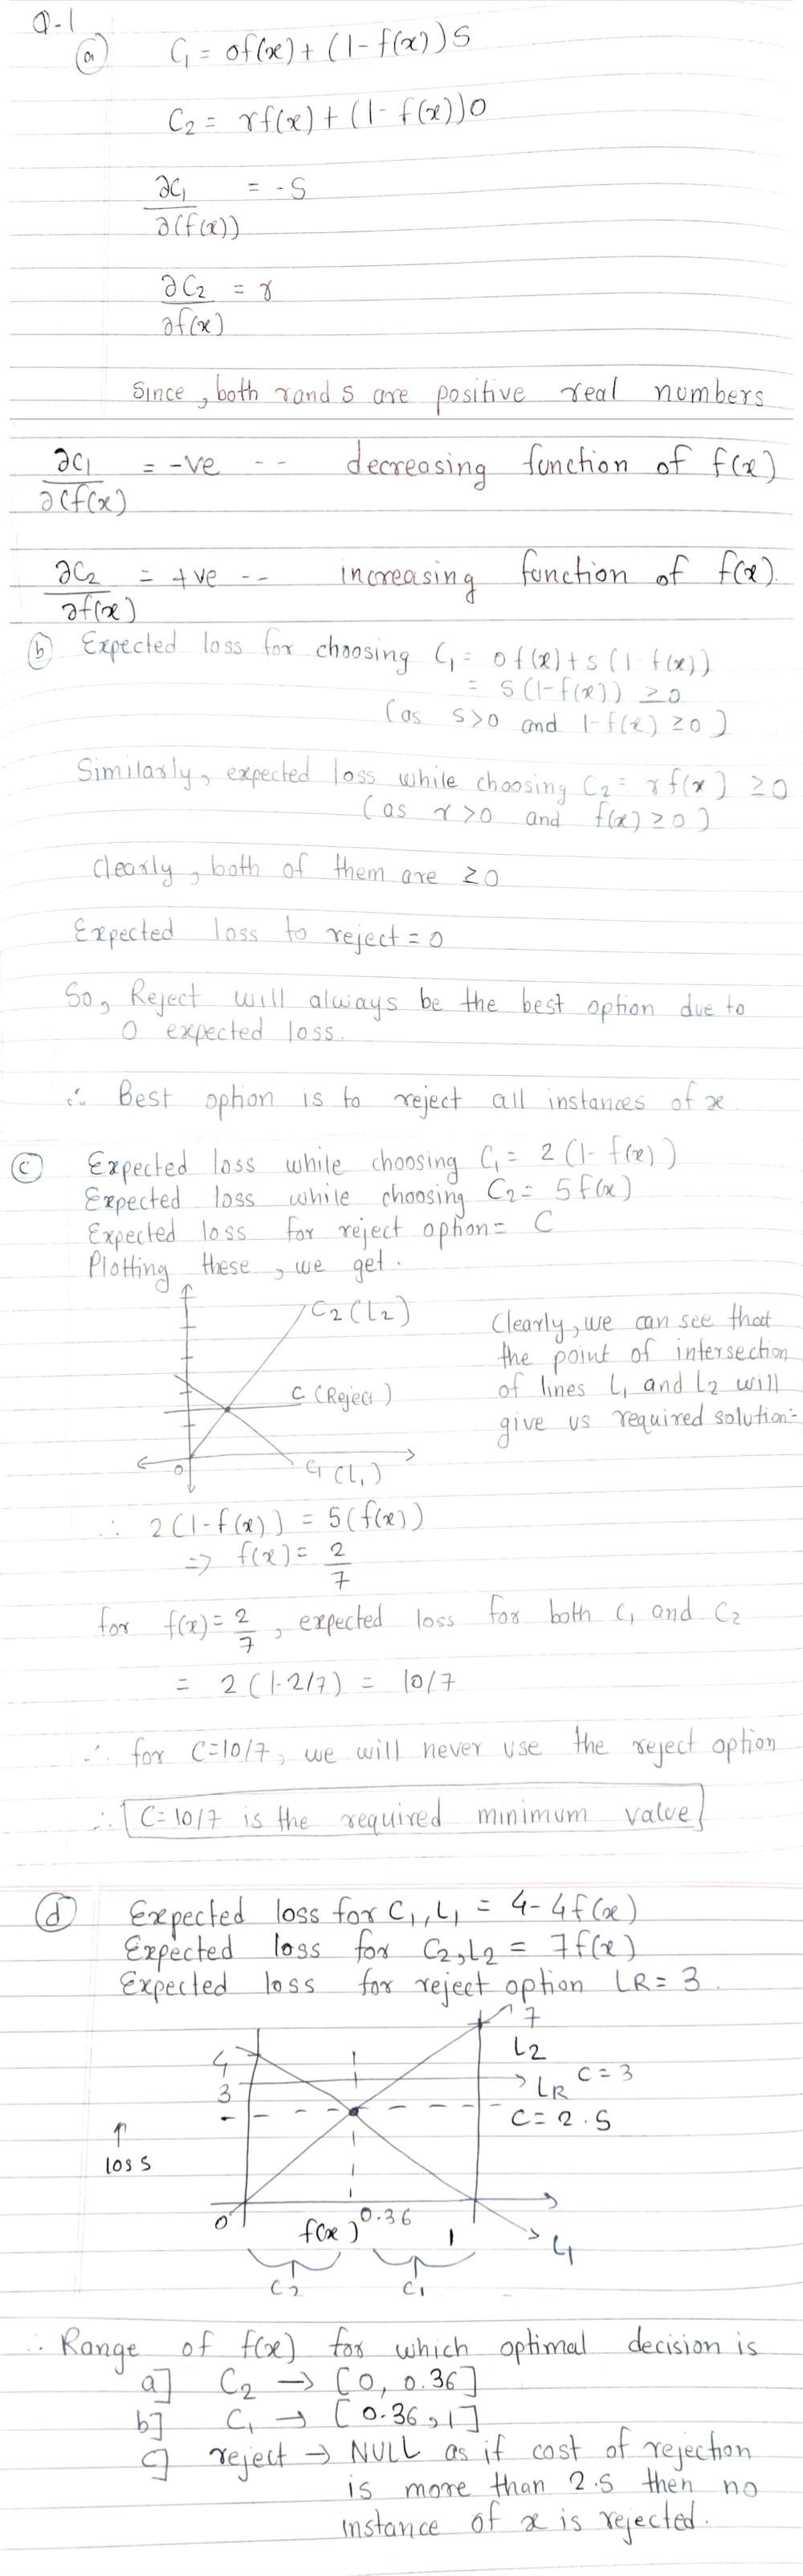

In [2]:
display.Image("https://raw.githubusercontent.com/kshitijmahajan1998/AML_NEW/master/AML4.png")

# Question 2: Logistic Regression [5 points]
Consider the problem of predicting the success of students in their undergraduate degrees given their high school GPA and SAT scores. We have the variables $X_1 =$ high school GPA, $X_2$ = SAT score and Y = completing the undergraduate degree (binary). We then fit a logistic regression which produces coefficients, $β_0 = −7$, $β_1 = 2$, $β_2 = 0.001$ Estimate the probability that George who
has a GPA of 3.4 and an SAT score of 1500 will complete his undergraduate degree successfully according to this model. By how much will the probability increase if the GPA increases to 3.7, with other factors remaining the same?

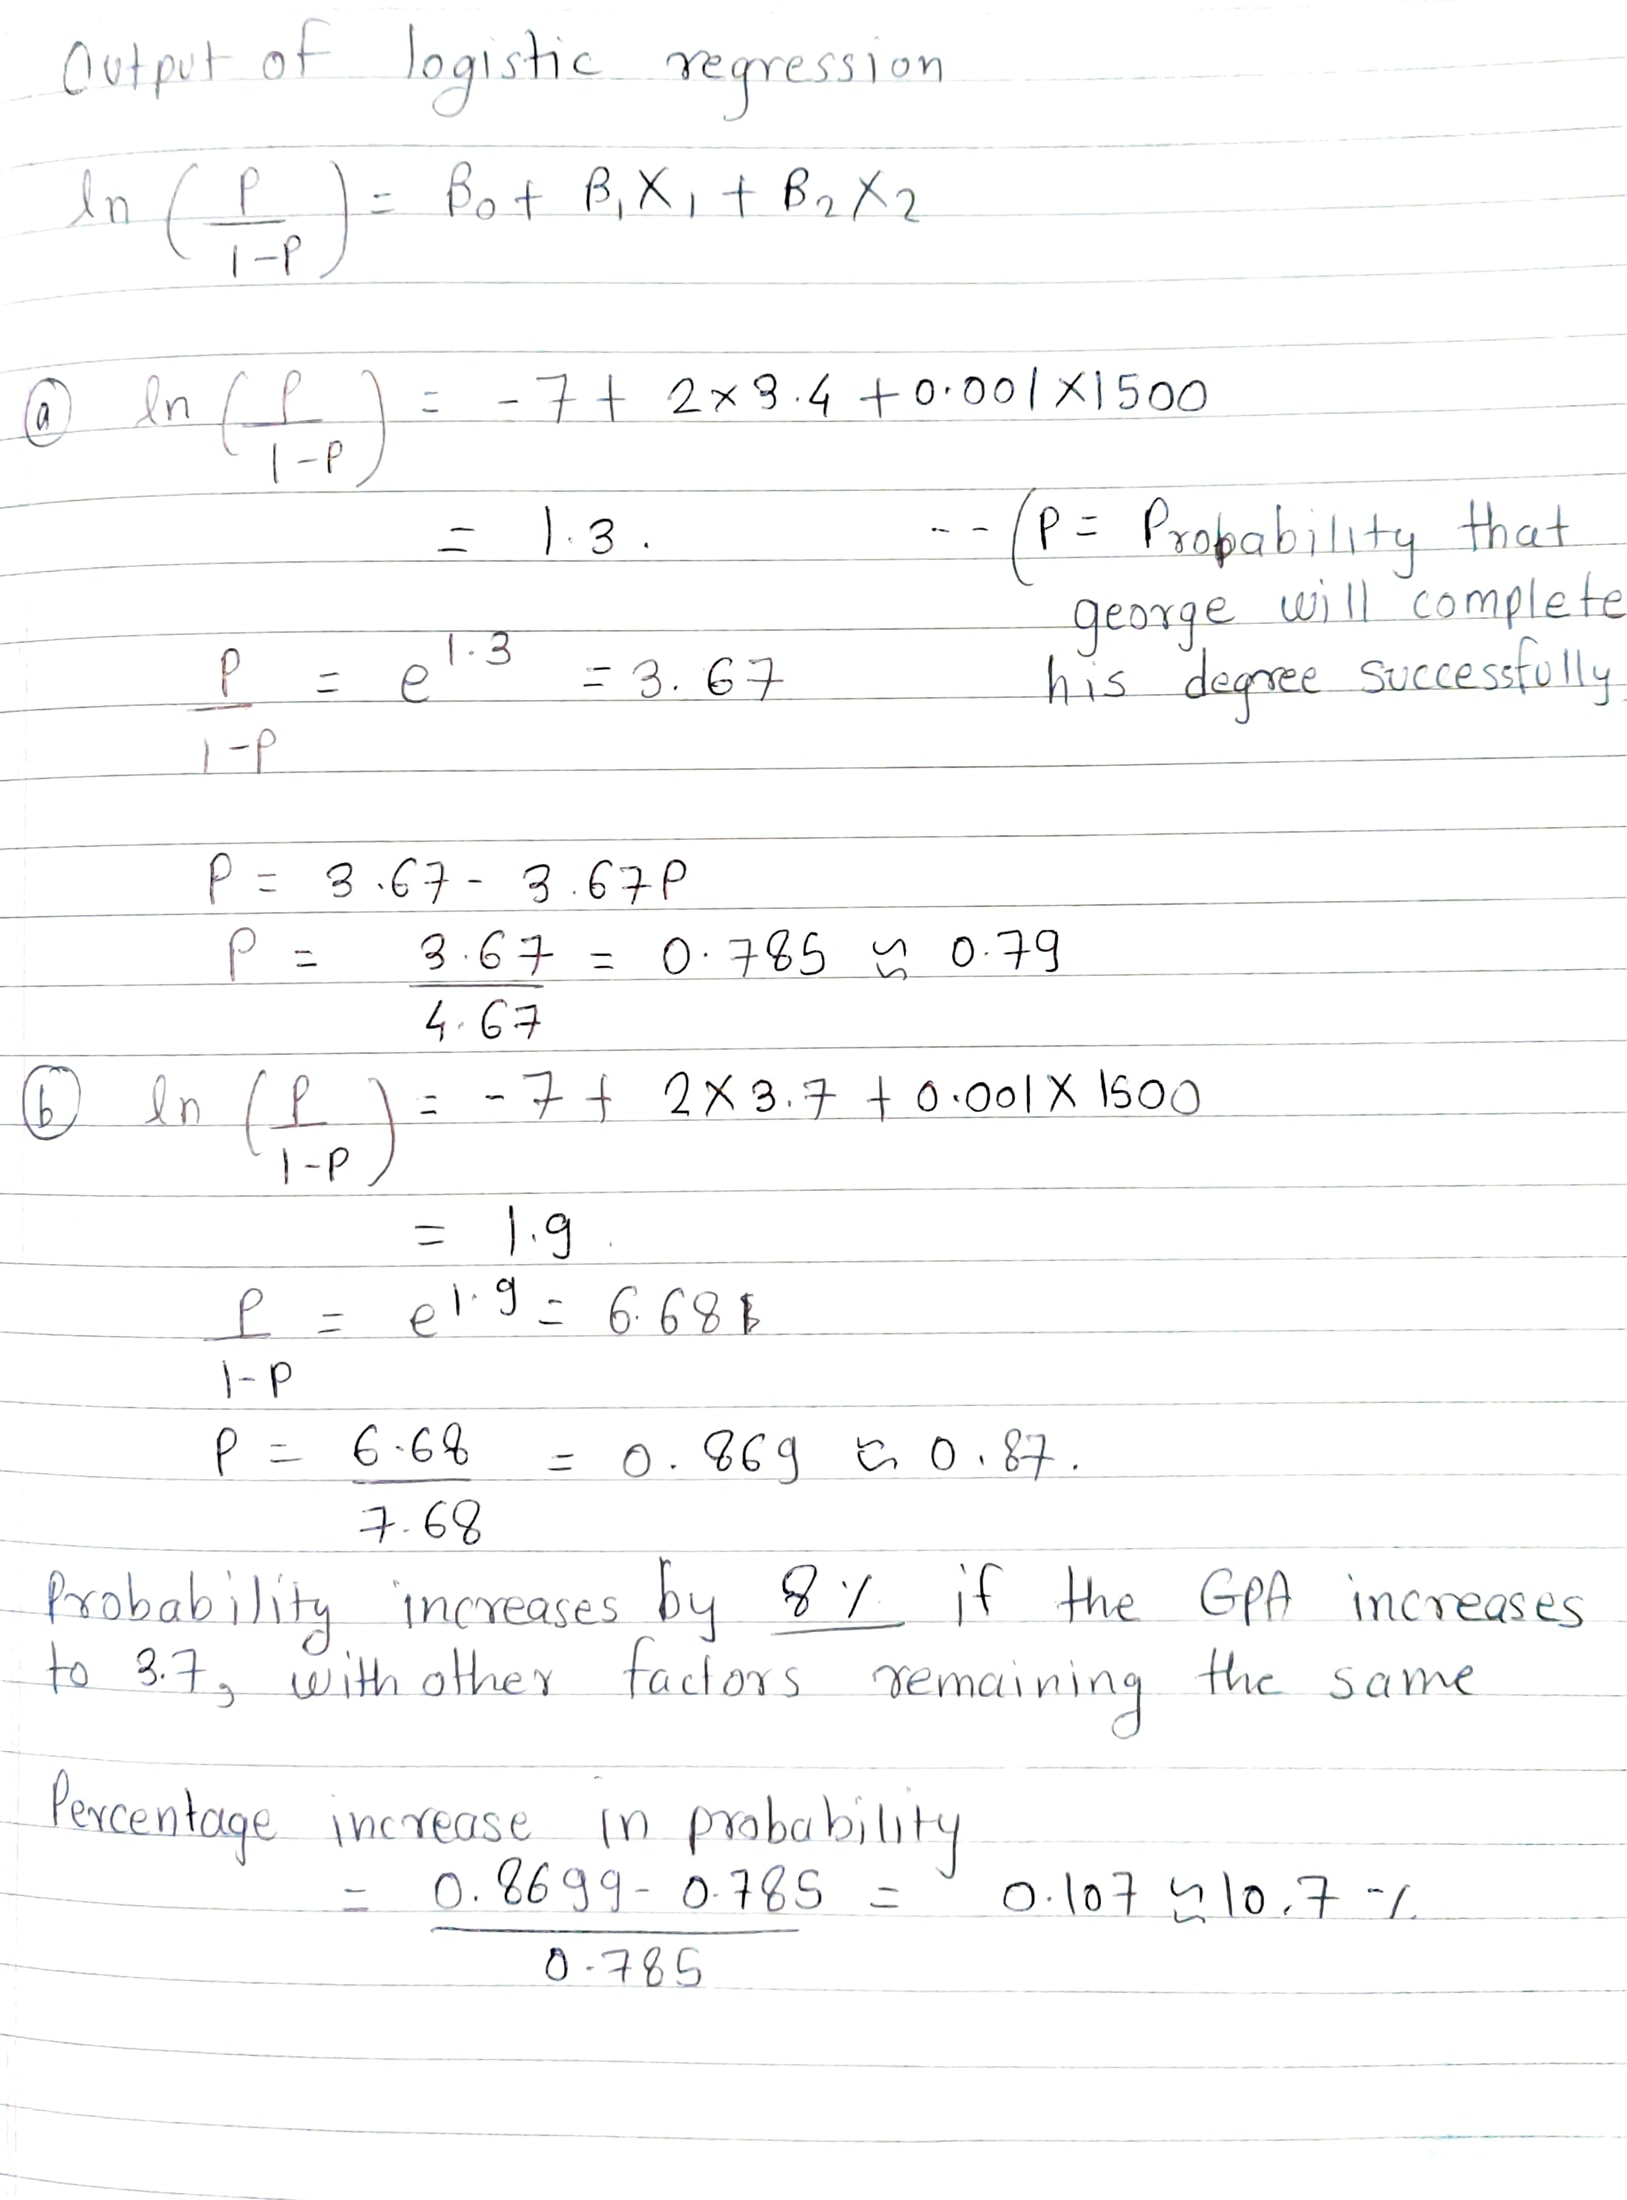

In [3]:
display.Image("https://raw.githubusercontent.com/kshitijmahajan1998/AML_NEW/master/Q2_1.jpeg")


# Question 3: Classification and Handling Class Imbalance [35 points + 5 bonus points]

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/GandhiDisha/Advanced-Machine-Learning-Course/master/Homework%204/data/customer_churn_telcom.csv', index_col=0)


In [5]:
# Printing the first five rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing 

### (a) [1 pt] Some of the columns have values like - no internet service or no phone service. Replace these two values with with a simple No

In [7]:
# Replace values with No
values_to_be_replaced=['No internet service','No phone service']
columns=['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for i in columns:
    df.loc[df[i].isin(values_to_be_replaced), i ] = 'No'

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### (b) [1 pt] Convert all 'Yes' values to 1 and 'No' values to 0 <br>
### (c) [1 pt] Convert all  'Female' values to 1 and 'Male' values to 0

In [8]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in yes_no_columns:
    df.loc[df[i] == 'Yes', i] = 1
    df.loc[df[i] == 'No', i] = 0

df['gender']=df['gender'].replace(['Female','Male'],[1,0])

print_unique_col_values(df)

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: [0 1]


### (d) [2 pts] Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [9]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

# Your code here

df2 = pd.get_dummies(df, columns = ['InternetService', 'Contract','PaymentMethod'])
print_unique_col_values(df2)

Partner: [1 0]
Dependents: [0 1]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
Churn: [0 1]


In [10]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [11]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

### e) [1 pt] Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training data further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [12]:
# Train test split
X = df2.drop(['Churn'],axis=1)
Y = df['Churn']
# splitting first into train and test
x_train_temp, x_test, y_train_temp, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y,random_state=15)

# splitting train further into train and validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train_temp, y_train_temp, train_size=0.80, stratify=y_train_temp, random_state=15)

print(x_train.shape), print(y_train.shape)
print(x_valid.shape), print(y_valid.shape)
print(x_test.shape), print(y_test.shape)

(4500, 26)
(4500,)
(1125, 26)
(1125,)
(1407, 26)
(1407,)


(None, None)

In [13]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data 
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', Y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## [15 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.

### (a) [5 pts (+5 bonus points)] Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models (you can either use default parameters for MLP classifier or change them to obtain higher performance for additional bonus of 5 points). <br>

Helpful resources can be found here - 
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Note: In this question, we are using the default parameters for MLP classifier, but you can change these parameters to obtain higher accuracies. **For a bonus of 5 points, experiment with these parameters to obtain a higher performance (in terms of accuracy and AUC-ROC scores).**

#### Decision Tree

In [14]:
# Answer here
y_train=y_train.astype('int')
clf = tree.DecisionTreeClassifier(max_depth =5, random_state = 50)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=50)

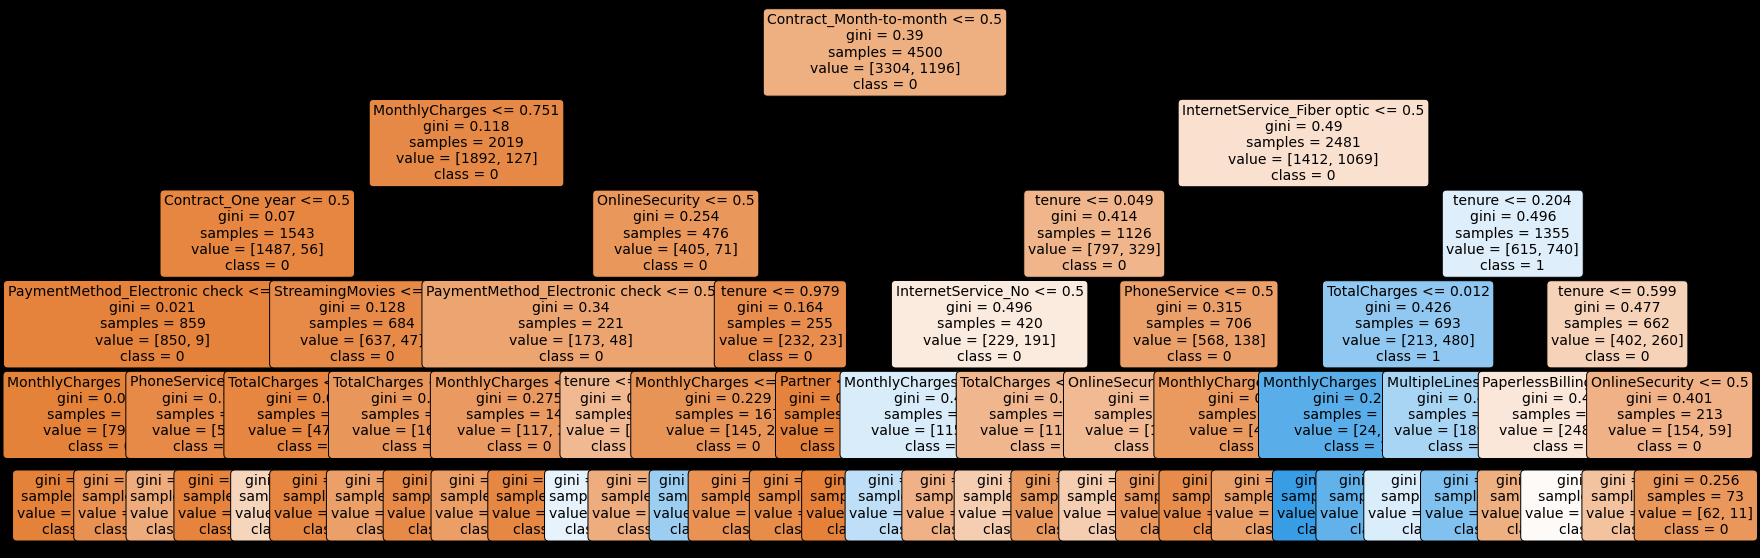

In [15]:
#save the feature name and target variables
feature_names = x_train.columns
labels = y_train.unique()
labels = labels.astype(str)

#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')

#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_names,
                   #use the class names stored
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [16]:
test_pred_decision_tree = clf.predict(x_test)
validation_pred_decision_tree = clf.predict(x_valid)
print("F1 score on test dataset")
print(f1_score(y_test.astype(int), test_pred_decision_tree.astype(int)))
print("F1 score on validation dataset")
print(f1_score(y_valid.astype(int), validation_pred_decision_tree.astype(int) ))

F1 score on test dataset
0.5186335403726708
F1 score on validation dataset
0.5310734463276836


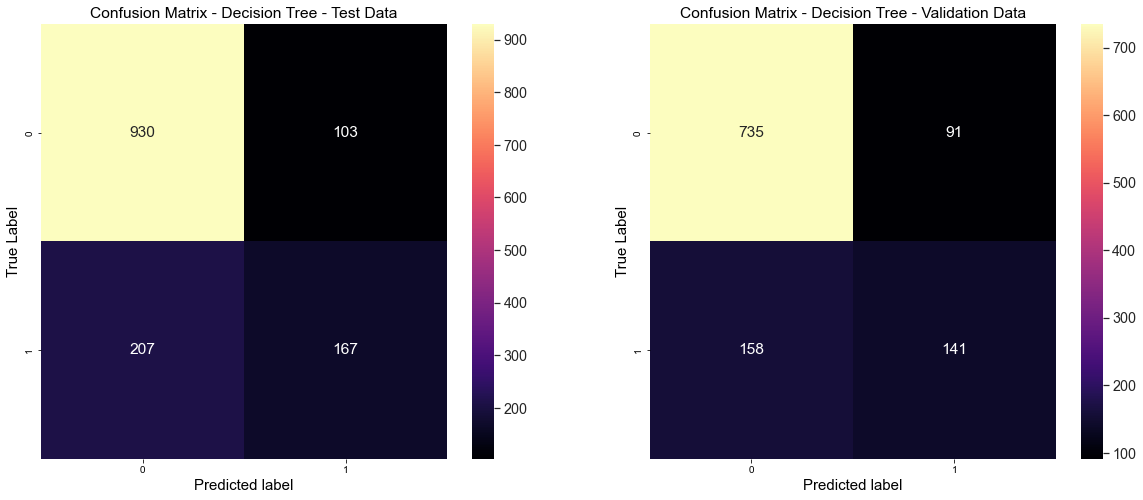

In [17]:
#get the confusion matrix
confusion_matrix_test = metrics.confusion_matrix(y_test.astype(int),  
                                            test_pred_decision_tree.astype(int))
confusion_matrix_validation = metrics.confusion_matrix(y_valid.astype(int),  
                                            validation_pred_decision_tree.astype(int))
#turn this into a dataframe
matrix_test_df = pd.DataFrame(confusion_matrix_test)
matrix_validation_df = pd.DataFrame(confusion_matrix_validation)

#plot the result
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(matrix_test_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - Decision Tree - Test Data')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(matrix_validation_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - Decision Tree - Validation Data')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()

#### Logistic Regression

In [18]:
# Answer here
y_train=y_train.astype('int')
lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [19]:
test_pred_logistic_regression = lgr.predict(x_test)
validation_pred_logistic_regression = lgr.predict(x_valid)
print("F1 score on test dataset")
print(f1_score(y_test.astype(int), test_pred_logistic_regression.astype(int)))
print("F1 score on validation dataset")
print(f1_score(y_valid.astype(int), validation_pred_logistic_regression.astype(int) ))

F1 score on test dataset
0.5982404692082111
F1 score on validation dataset
0.5703839122486288


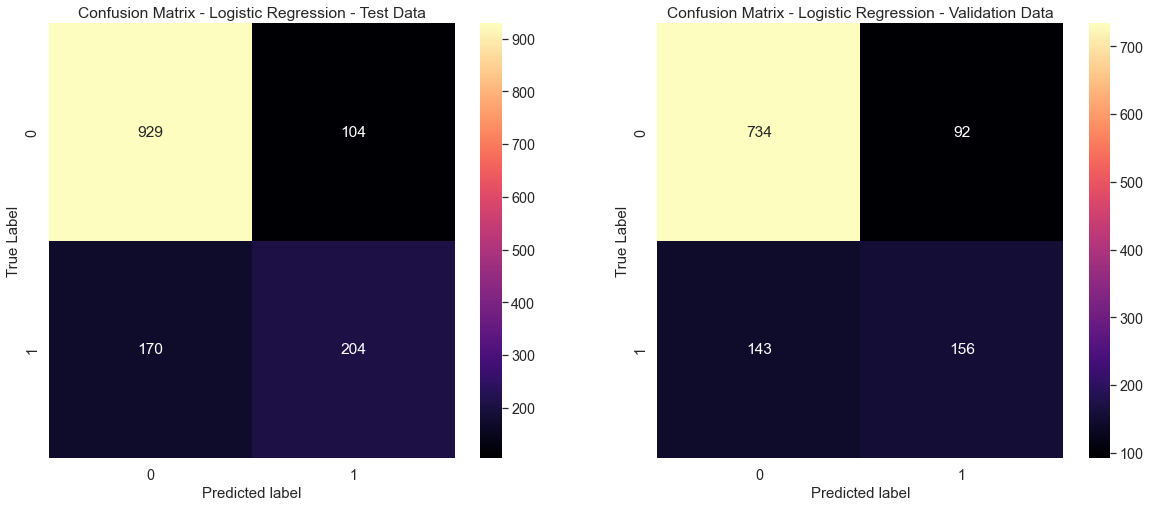

In [20]:
#get the confusion matrix
confusion_matrix_test = metrics.confusion_matrix(y_test.astype(int),  
                                            test_pred_logistic_regression.astype(int))
confusion_matrix_validation = metrics.confusion_matrix(y_valid.astype(int),  
                                            validation_pred_logistic_regression.astype(int))
#turn this into a dataframe
matrix_test_df = pd.DataFrame(confusion_matrix_test)
matrix_validation_df = pd.DataFrame(confusion_matrix_validation)

#plot the result
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(matrix_test_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - Logistic Regression - Test Data')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(matrix_validation_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - Logistic Regression - Validation Data')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()

#### Untuned MLP Classifier

In [21]:
# Answer here
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

MLPClassifier()

In [22]:
test_pred_mlp_classifier = mlp.predict(x_test)
validation_pred_mlp_classifier = mlp.predict(x_valid)
print("F1 score on test dataset")
print(f1_score(y_test.astype(int), test_pred_mlp_classifier.astype(int)))
print("F1 score on validation dataset")
print(f1_score(y_valid.astype(int), validation_pred_mlp_classifier.astype(int) ))
print("Accuracy on validation dataset")
print(accuracy_score(y_valid.astype(int), validation_pred_mlp_classifier.astype(int)))
print("Accuracy on test dataset")
print(accuracy_score(y_test.astype(int), test_pred_mlp_classifier.astype(int)))

F1 score on test dataset
0.5166402535657686
F1 score on validation dataset
0.5252918287937743
Accuracy on validation dataset
0.7831111111111111
Accuracy on test dataset
0.783226723525231


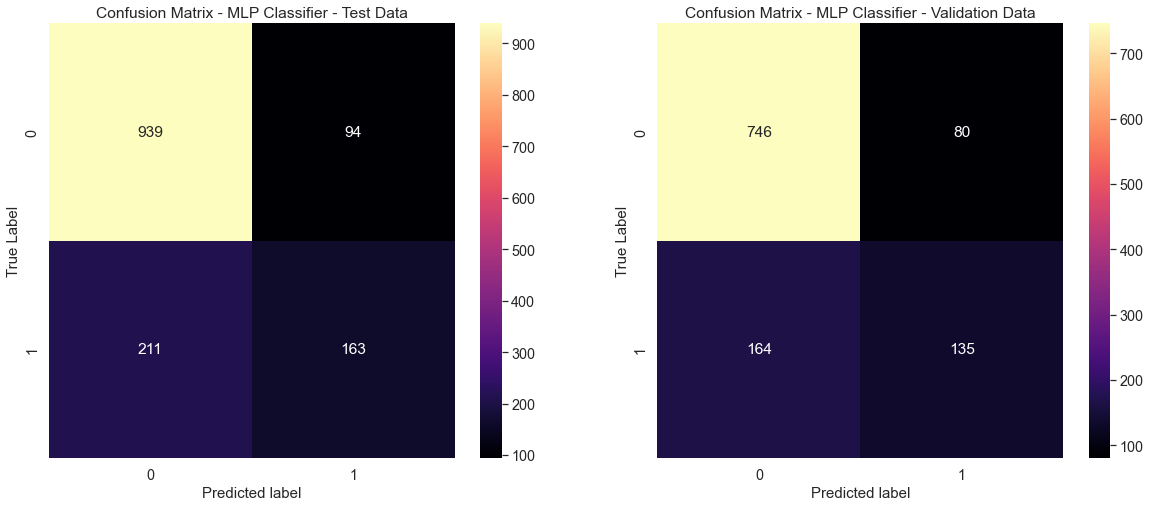

In [23]:
#get the confusion matrix
confusion_matrix_test = metrics.confusion_matrix(y_test.astype(int),  
                                            test_pred_mlp_classifier.astype(int))
confusion_matrix_validation = metrics.confusion_matrix(y_valid.astype(int),  
                                            validation_pred_mlp_classifier.astype(int))
#turn this into a dataframe
matrix_test_df = pd.DataFrame(confusion_matrix_test)
matrix_validation_df = pd.DataFrame(confusion_matrix_validation)

#plot the result
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(matrix_test_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - MLP Classifier - Test Data')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(matrix_validation_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - MLP Classifier - Validation Data')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()

#### Tuned MLP classifier

In [24]:
parameter_space = {
    'hidden_layer_sizes': [(10,10,), (20,20,), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[3000],
    'learning_rate_init':[0.03, 0.003, 0.0003]
}

In [25]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
import warnings
warnings.filterwarnings('ignore')
mlp_gs = MLPClassifier()

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 10), (20, 20), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.03, 0.003, 0.0003],
                         'max_iter': [3000], 'solver': ['sgd', 'adam']})

In [26]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.0003, 'max_iter': 3000, 'solver': 'adam'}


In [27]:
# Changing the default parameters of MLP to obtain higher performance for additional bonus of 5 points)
mlp=MLPClassifier(hidden_layer_sizes=(20,), learning_rate='constant', learning_rate_init= 0.0003,
                  solver='sgd',max_iter=3000, activation='relu', alpha=  0.05)
mlp.fit(x_train,y_train)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(20,), learning_rate_init=0.0003,
              max_iter=3000, solver='sgd')

In [28]:
test_pred_mlp_classifier = mlp.predict(x_test)
validation_pred_mlp_classifier = mlp.predict(x_valid)
print("F1 score on test dataset")
print(f1_score(y_test.astype(int), test_pred_mlp_classifier.astype(int)))
print("F1 score on validation dataset")
print(f1_score(y_valid.astype(int), validation_pred_mlp_classifier.astype(int) ))
print("Accuracy on validation dataset")
print(accuracy_score(y_valid.astype(int), validation_pred_mlp_classifier.astype(int)))
print("Accuracy on test dataset")
print(accuracy_score(y_test.astype(int), test_pred_mlp_classifier.astype(int)))

F1 score on test dataset
0.5762195121951219
F1 score on validation dataset
0.5133079847908745
Accuracy on validation dataset
0.7724444444444445
Accuracy on test dataset
0.8024164889836531


<b>Accuracy</b> on test data increased from 0.78 to 0.80

<b>F1 score</b> on dataset increased from 0.51 to 0.57

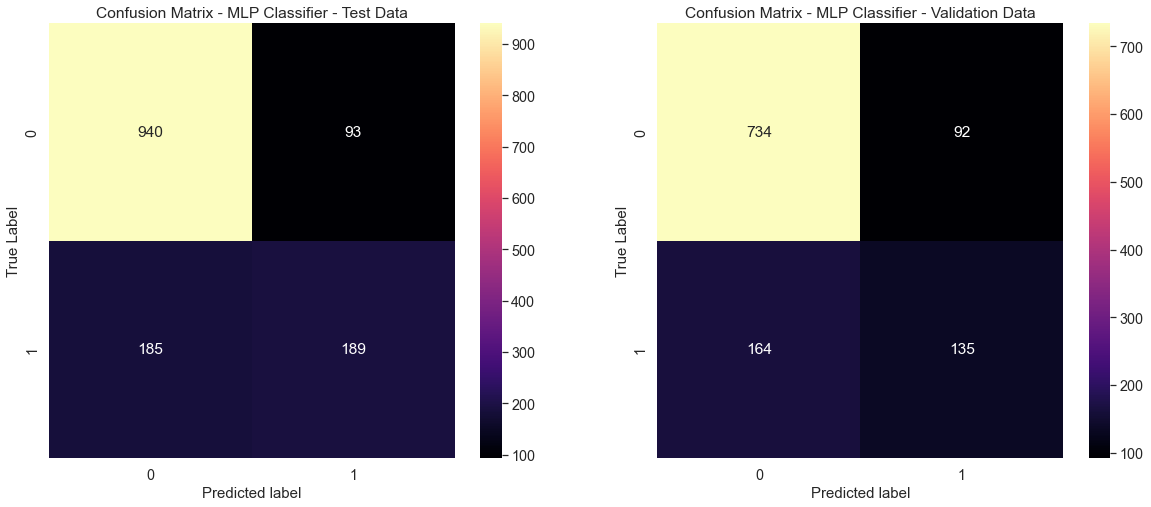

In [29]:
#get the confusion matrix
confusion_matrix_test = metrics.confusion_matrix(y_test.astype(int),  
                                            test_pred_mlp_classifier.astype(int))
confusion_matrix_validation = metrics.confusion_matrix(y_valid.astype(int),  
                                            validation_pred_mlp_classifier.astype(int))
#turn this into a dataframe
matrix_test_df = pd.DataFrame(confusion_matrix_test)
matrix_validation_df = pd.DataFrame(confusion_matrix_validation)

#plot the result
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(matrix_test_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - MLP Classifier - Test Data')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(matrix_validation_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - MLP Classifier - Validation Data')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()

### (b) [5 pts] Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions). <br>

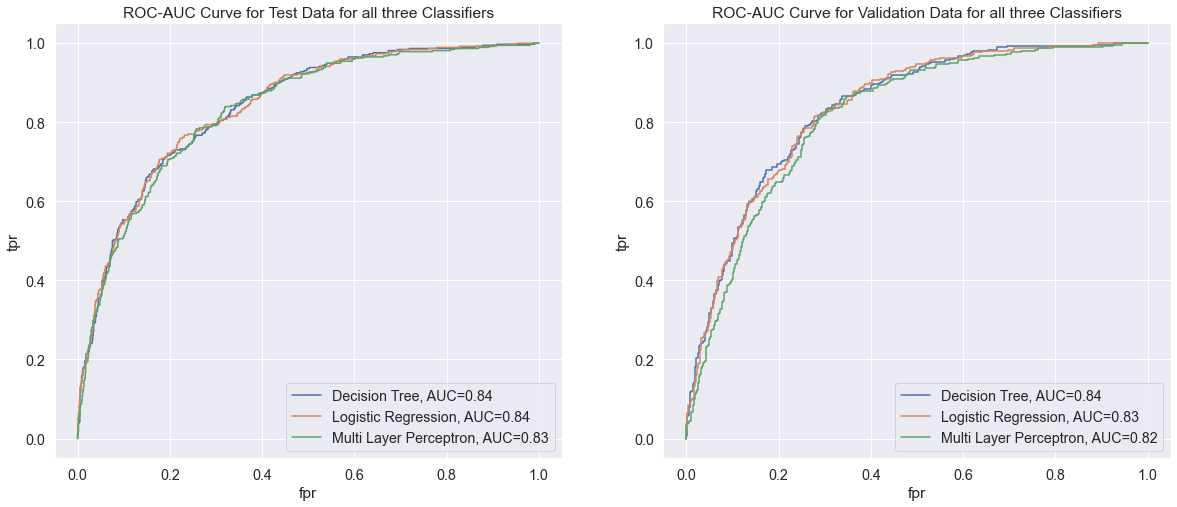

In [30]:
# Plot ROC curves

y_pred_proba_test_dt = clf.predict_proba(x_test)[::,1]
fpr_test_dt, tpr_test_dt, threshold_test_dt = metrics.roc_curve(y_test.astype(int),  y_pred_proba_test_dt)
auc_test_dt = metrics.roc_auc_score(y_test.astype(int), y_pred_proba_test_dt)

y_pred_proba_test_lr = lgr.predict_proba(x_test)[::,1]
fpr_test_lr, tpr_test_lr, threshold_test_lr = metrics.roc_curve(y_test.astype(int),  y_pred_proba_test_lr)
auc_test_lr = metrics.roc_auc_score(y_test.astype(int), y_pred_proba_test_lr)

y_pred_proba_test_mlp = mlp.predict_proba(x_test)[::,1]
fpr_test_mlp, tpr_test_mlp, threshold_test_mlp = metrics.roc_curve(y_test.astype(int),  y_pred_proba_test_mlp)
auc_test_mlp = metrics.roc_auc_score(y_test.astype(int), y_pred_proba_test_mlp)

y_pred_proba_valid_dt = clf.predict_proba(x_valid)[::,1]
fpr_valid_dt, tpr_valid_dt, threshold_valid_dt = metrics.roc_curve(y_valid.astype(int),  y_pred_proba_valid_dt)
auc_valid_dt = metrics.roc_auc_score(y_valid.astype(int), y_pred_proba_valid_dt)

y_pred_proba_valid_lr = lgr.predict_proba(x_valid)[::,1]
fpr_valid_lr, tpr_valid_lr, threshold_valid_lr = metrics.roc_curve(y_valid.astype(int),  y_pred_proba_valid_lr)
auc_valid_lr = metrics.roc_auc_score(y_valid.astype(int), y_pred_proba_valid_lr)

y_pred_proba_valid_mlp = mlp.predict_proba(x_valid)[::,1]
fpr_valid_mlp, tpr_valid_mlp, threshold_valid_mlp = metrics.roc_curve(y_valid.astype(int),  y_pred_proba_valid_mlp)
auc_valid_mlp = metrics.roc_auc_score(y_valid.astype(int), y_pred_proba_valid_mlp)

fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
plt.plot(fpr_test_dt,tpr_test_dt,label="Decision Tree, AUC="+str(round(auc_test_dt,2)))
plt.plot(fpr_test_lr,tpr_test_lr,label="Logistic Regression, AUC="+str(round(auc_test_lr,2)))
plt.plot(fpr_test_mlp,tpr_test_mlp,label="Multi Layer Perceptron, AUC="+str(round(auc_test_mlp,2)))
plt.legend(loc=4)
plt.title('ROC-AUC Curve for Test Data for all three Classifiers')
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
plt.plot(fpr_valid_dt,tpr_valid_dt,label="Decision Tree, AUC="+str(round(auc_valid_dt,2)))
plt.plot(fpr_valid_lr,tpr_valid_lr,label="Logistic Regression, AUC="+str(round(auc_valid_lr,2)))
plt.plot(fpr_valid_mlp,tpr_valid_mlp,label="Multi Layer Perceptron, AUC="+str(round(auc_valid_mlp,2)))
plt.legend(loc=4)
plt.title('ROC-AUC Curve for Validation Data for all three Classifiers')
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.show()

### (c) [5 pts] Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

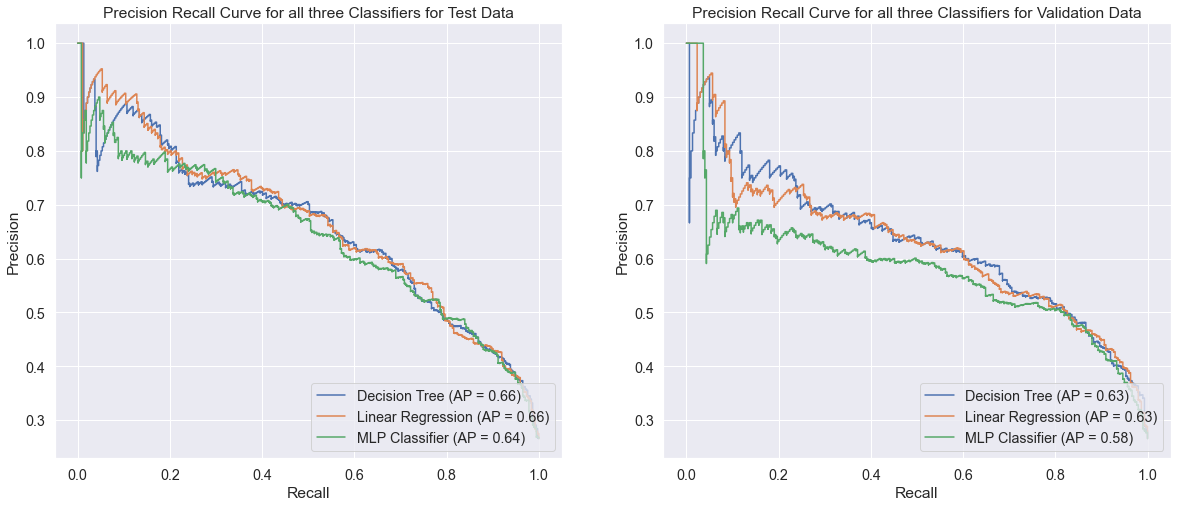

In [31]:
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
plot_precision_recall_curve(clf, x_test, y_test.astype(int), ax = plt.gca(),name = "Decision Tree")
plot_precision_recall_curve(lgr, x_test, y_test.astype(int), ax = plt.gca(),name = "Linear Regression")
plot_precision_recall_curve(mlp, x_test, y_test.astype(int), ax = plt.gca(),name = "MLP Classifier")
plt.legend(loc=4)
plt.title('Precision Recall Curve for all three Classifiers for Test Data')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.subplot(1,2,2)
plot_precision_recall_curve(clf, x_valid, y_valid.astype(int), ax = plt.gca(),name = "Decision Tree")
plot_precision_recall_curve(lgr, x_valid, y_valid.astype(int), ax = plt.gca(),name = "Linear Regression")
plot_precision_recall_curve(mlp, x_valid, y_valid.astype(int), ax = plt.gca(),name = "MLP Classifier")
plt.legend(loc=4)
plt.title('Precision Recall Curve for all three Classifiers for Validation Data')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

## [4 points] Handling Class Imbalance with SMOTE

Go through the documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to understand how to use imbalanced-learn's SMOTE to counter class imbalance in the data.

### (a) [1 pt] Split the data into training (80%) and test sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [32]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y ,random_state=15)

print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(5625, 26)
(5625,)
(1407, 26)
(1407,)


(None, None)

### (b) [2 pts] Perform SMOTE on the training data and print the value counts of the target variable in the data.

In [33]:
# Answer here
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train.astype(int))
y_train_sm.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

### (c) [1 pt] Split the updated training data (on which SMOTE has been run) further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [34]:
# Answer here
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train.astype(int))
x_train_smote, x_valid_smote, y_train_smote, y_valid_smote = train_test_split(x_train_sm, y_train_sm, test_size=0.20, stratify=y_train_sm ,random_state=15)

In [35]:
# Number of classes in training Data
y_train_smote.value_counts()

1    3304
0    3304
Name: Churn, dtype: int64

In [36]:
# Number of classes in validation Data
y_valid_smote.value_counts()

1    826
0    826
Name: Churn, dtype: int64

## [2 points] Retraining the Classifiers

Now that we have created synthetic samples of the minority class, let's proceed further to see if we see any improvements in our results. For the two models - Logistic regressor and MLP, do the folowing:

### (a) [1 pt] Train a model on the training dataset. <br>
### (b) [1 pt] Make predictions on the test data using the trained model and print confusion matrix for both - the validation and the test data.

#### Logistic Regression

In [37]:
# Answer here
y_train=y_train.astype('int')
lgr = LogisticRegression()
lgr.fit(x_train_smote, y_train_smote)

LogisticRegression()

In [38]:
test_pred_logistic_regression = lgr.predict(x_test)
validation_pred_logistic_regression = lgr.predict(x_valid_smote)
print("F1 score on test dataset")
print(f1_score(y_test.astype(int), test_pred_logistic_regression.astype(int)))
print("F1 score on validation dataset")
print(f1_score(y_valid_smote.astype(int), validation_pred_logistic_regression.astype(int) ))

F1 score on test dataset
0.6275787187839306
F1 score on validation dataset
0.7865429234338748


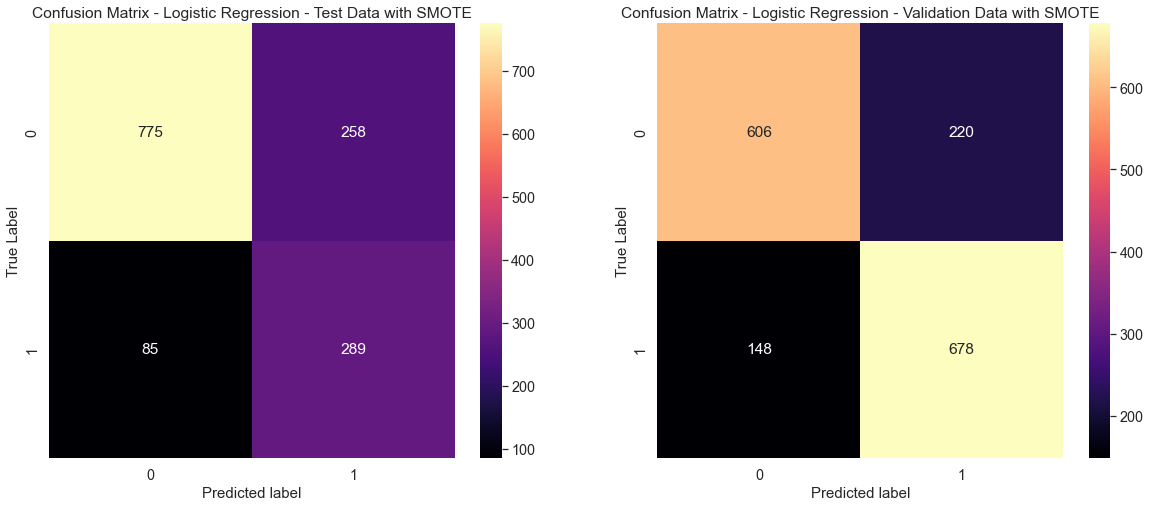

In [39]:
#get the confusion matrix
confusion_matrix_test = metrics.confusion_matrix(y_test.astype(int),  
                                            test_pred_logistic_regression.astype(int))
confusion_matrix_validation = metrics.confusion_matrix(y_valid_smote.astype(int),  
                                            validation_pred_logistic_regression.astype(int))
#turn this into a dataframe
matrix_test_df = pd.DataFrame(confusion_matrix_test)
matrix_validation_df = pd.DataFrame(confusion_matrix_validation)

#plot the result
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(matrix_test_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - Logistic Regression - Test Data with SMOTE')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(matrix_validation_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - Logistic Regression - Validation Data with SMOTE')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()

#### MLP 

In [48]:
mlp=MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier()

In [50]:
test_pred_mlp_classifier = mlp.predict(x_test)
validation_pred_mlp_classifier = mlp.predict(x_valid_smote)
print("F1 score on test dataset")
print(f1_score(y_test.astype(int), test_pred_mlp_classifier.astype(int)))
print("F1 score on validation dataset")
print(f1_score(y_valid_smote.astype(int), validation_pred_mlp_classifier.astype(int) ))

F1 score on test dataset
0.5677233429394813
F1 score on validation dataset
0.7428170988086897


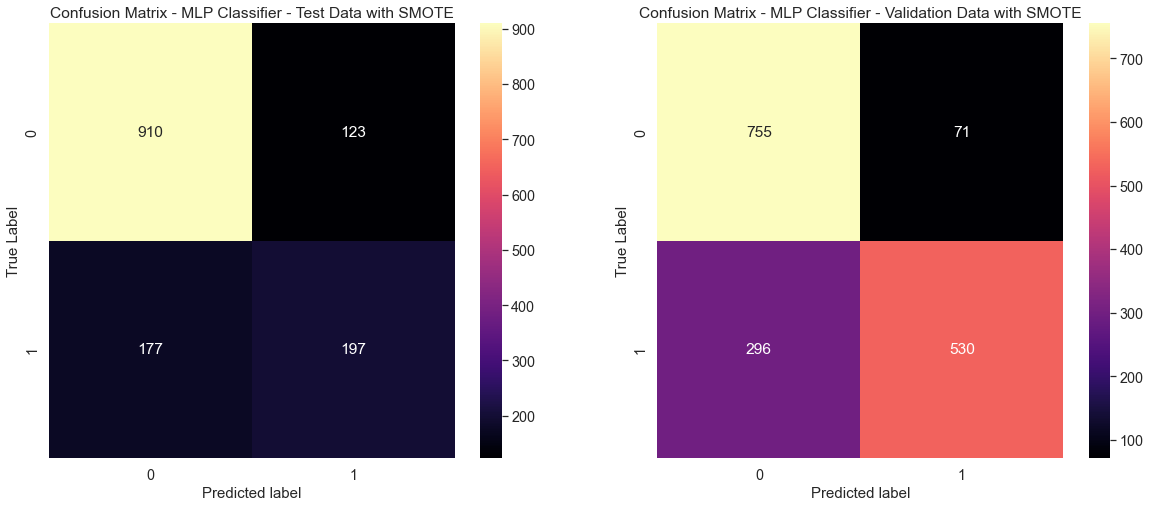

In [51]:
#get the confusion matrix
confusion_matrix_test = metrics.confusion_matrix(y_test.astype(int),  
                                            test_pred_mlp_classifier.astype(int))
confusion_matrix_validation = metrics.confusion_matrix(y_valid_smote.astype(int),  
                                            validation_pred_mlp_classifier.astype(int))
#turn this into a dataframe
matrix_test_df = pd.DataFrame(confusion_matrix_test)
matrix_validation_df = pd.DataFrame(confusion_matrix_validation)

#plot the result
fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
sns.heatmap(matrix_test_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - MLP Classifier - Test Data with SMOTE')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
sns.heatmap(matrix_validation_df, annot=True, fmt="g", cmap="magma")
plt.title('Confusion Matrix - MLP Classifier - Validation Data with SMOTE')
plt.xlabel("Predicted label", fontsize =15)
plt.ylabel("True Label", fontsize=15)

plt.show()

## [9 points] Plotting and Comparison
### a) [1 pt] For the two classifiers (Logistic regression and MLP) - plot the ROC Curves in a single graph, display the AUC-ROC scores in this plot as well on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>

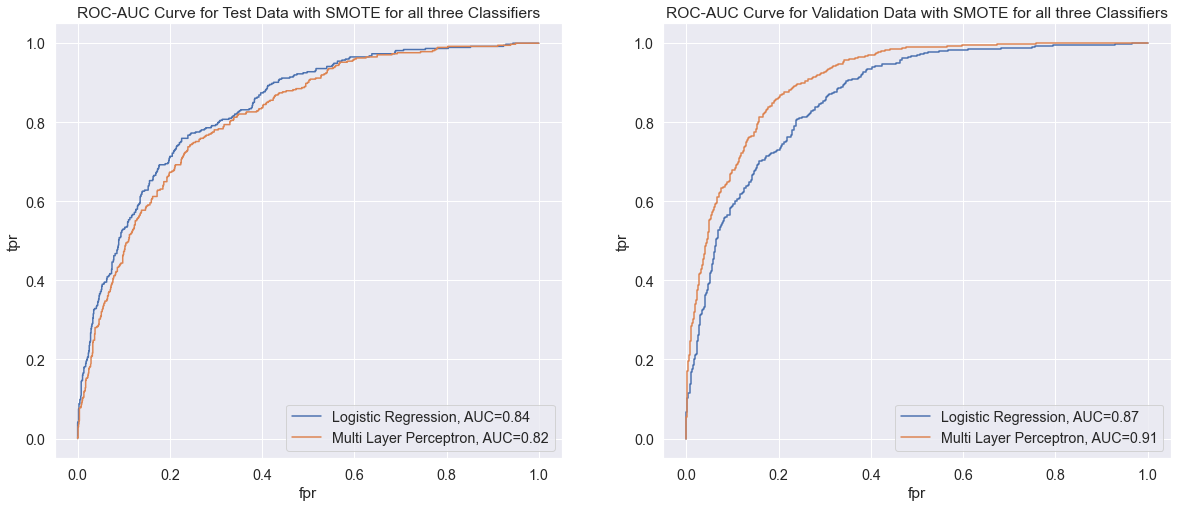

In [52]:

y_pred_proba_test_lr = lgr.predict_proba(x_test)[::,1]
fpr_test_lr, tpr_test_lr, threshold_test_lr = metrics.roc_curve(y_test.astype(int),  y_pred_proba_test_lr)
auc_test_lr = metrics.roc_auc_score(y_test.astype(int), y_pred_proba_test_lr)

y_pred_proba_test_mlp = mlp.predict_proba(x_test)[::,1]
fpr_test_mlp, tpr_test_mlp, threshold_test_mlp = metrics.roc_curve(y_test.astype(int),  y_pred_proba_test_mlp)
auc_test_mlp = metrics.roc_auc_score(y_test.astype(int), y_pred_proba_test_mlp)


y_pred_proba_valid_lr = lgr.predict_proba(x_valid_smote)[::,1]
fpr_valid_lr, tpr_valid_lr, threshold_valid_lr = metrics.roc_curve(y_valid_smote.astype(int),  y_pred_proba_valid_lr)
auc_valid_lr = metrics.roc_auc_score(y_valid_smote.astype(int), y_pred_proba_valid_lr)

y_pred_proba_valid_mlp = mlp.predict_proba(x_valid_smote)[::,1]
fpr_valid_mlp, tpr_valid_mlp, threshold_valid_mlp = metrics.roc_curve(y_valid_smote.astype(int),  y_pred_proba_valid_mlp)
auc_valid_mlp = metrics.roc_auc_score(y_valid_smote.astype(int), y_pred_proba_valid_mlp)

fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
sns.set(font_scale=1.3)
plt.plot(fpr_test_lr,tpr_test_lr,label="Logistic Regression, AUC="+str(round(auc_test_lr,2)))
plt.plot(fpr_test_mlp,tpr_test_mlp,label="Multi Layer Perceptron, AUC="+str(round(auc_test_mlp,2)))
plt.legend(loc=4)
plt.title('ROC-AUC Curve for Test Data with SMOTE for all three Classifiers')
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.subplot(1,2,2)
sns.set(font_scale=1.3)
plt.plot(fpr_valid_lr,tpr_valid_lr,label="Logistic Regression, AUC="+str(round(auc_valid_lr,2)))
plt.plot(fpr_valid_mlp,tpr_valid_mlp,label="Multi Layer Perceptron, AUC="+str(round(auc_valid_mlp,2)))
plt.legend(loc=4)
plt.title('ROC-AUC Curve for Validation Data with SMOTE for all three Classifiers')
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.show()

### b) [1 pt] Plot the Precision-Recall curves for the two classifiers in a single graph on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>

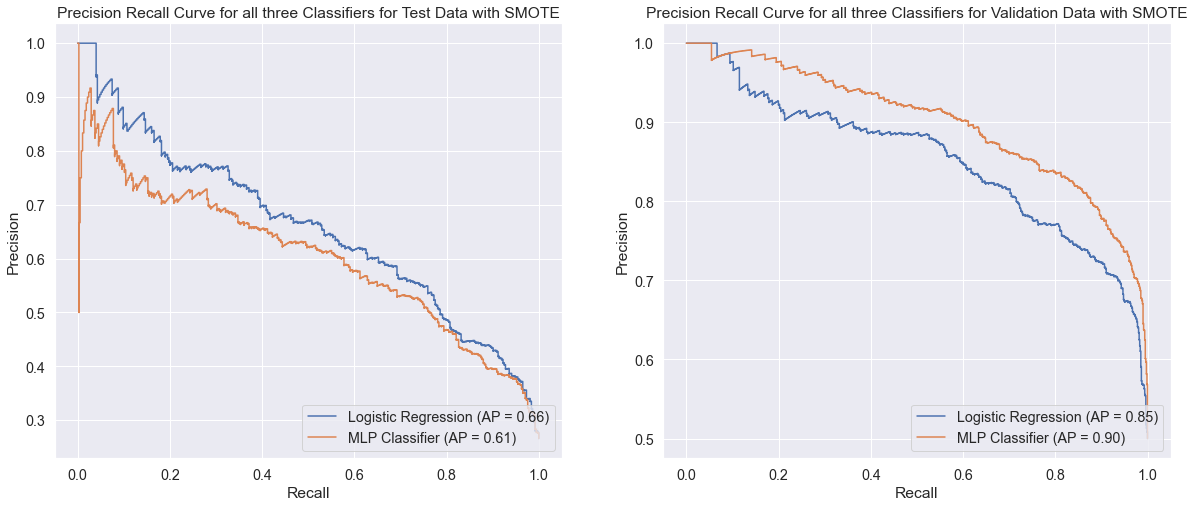

In [53]:

fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2);

plt.subplot(1,2,1)
plot_precision_recall_curve(lgr, x_test, y_test.astype(int), ax = plt.gca(),name = "Logistic Regression")
plot_precision_recall_curve(mlp, x_test, y_test.astype(int), ax = plt.gca(),name = "MLP Classifier")
plt.legend(loc=4)
plt.title('Precision Recall Curve for all three Classifiers for Test Data with SMOTE')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.subplot(1,2,2)
plot_precision_recall_curve(lgr, x_valid_smote, y_valid_smote.astype(int), ax = plt.gca(),name = "Logistic Regression")
plot_precision_recall_curve(mlp, x_valid_smote, y_valid_smote.astype(int), ax = plt.gca(),name = "MLP Classifier")
plt.legend(loc=4)
plt.title('Precision Recall Curve for all three Classifiers for Validation Data with SMOTE')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

### c) [7 pts] Compare and contrast the performance of the classifiers with reference to these two plots and with reference to the plots that were computed before using SMOTE. Specifically comment on what you observed regarding the difference in performance on the validation vs. the test dataset, which is a better representative of the actual/original problem.

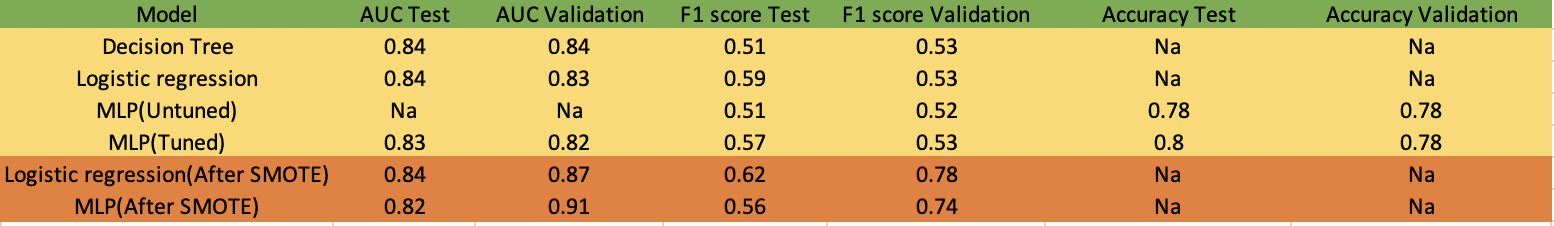

In [56]:
display.Image("https://raw.githubusercontent.com/kshitijmahajan1998/AML_NEW/master/comparison1.png")

* The ***F1-score increases*** marginally on the test dataset for both lr and mlp (untuned) after using SMOTE. For logistic regression (test data) - the f1 score increases from 59% to 62% and for mlp (test data) it increases from 51% to 57%
* On the other hand ***AUC score*** stays almost the same/decreases slightly on the test data for both lr and mlp.
* This shows that oversampling technique like SMOTE slightly increases the precision and recall for the model but it does not show a drastic change
* Moreover, validation data shows a dramatic increase in f1 score and AUC after SMOTE. This shows that the validation set is not a true representation of the original data.
* Oversampling might not always be a good idea to treat class imbalance. 
* Alternative ways to handle class imbalance is to use class weighting or changing the threshold of classiying the positive and negative classes

# Question 4: Bayesian Belief Networks [15 pts]



Refer to the Bayesian Network Belief image (uploaded with the notebook on canvas) for this question. 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Season = 1) = .001   
P(Atmospheric Pressure = 1) = .0.002


P(Rain = 1 | Season = 0, Atmospheric Pressure = 0) = .001  
P(Rain = 1 | Season = 0, Atmospheric Pressure = 1) = .29  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 0) = .94  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 1) = .95

P(Umbrella = 1 | Rain = 1) = .9  
P(Umbrella = 1 | Rain = 0) = .05

For the given Bayesian network, Compute the following probabilities : 


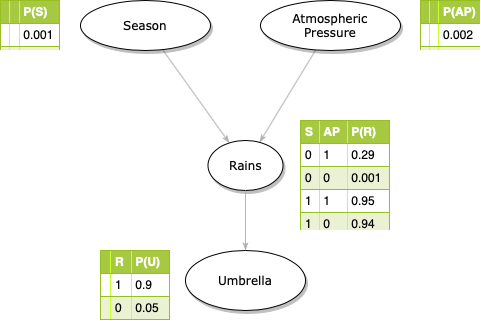

In [55]:
from IPython import display
display.Image("https://raw.githubusercontent.com/GandhiDisha/Advanced-Machine-Learning-Course/master/Homework%204/images/dag.png")

### (a) [4 pts] Find the probability that  Umbrella = 0

$$P(U) = P(U|R)P(R) + P(U|\hat{R})P(\hat{R})$$

$$P(U) = 0.9\times P(R) + 0.05 \times P(\hat{R})\space\space\space\space\space(i)$$

$$P(R) = P(R|S,P)P(S,P) + P(R|\hat{S},P)P(\hat{S},P) + P(R|S,\hat{P})P(S,\hat{P}) + P(R|\hat{S},\hat{P})P(\hat{S},\hat{P})$$

$$P(R) = 0.95\times(0.001\times0.002) + 0.29\times(0.999\times0.002) + 0.94\times(0.001\times0.998) + 0.001\times(0.999\times0.998)$$

$$P(R) = 0.002516$$

$$P(\hat{R}) = 1 - 0.002516 = 0.997484$$

$$Subsituting\space P(R)\space and\space P(\hat{R})\space in\space (i),\space we\space get,$$ 

$$P(U) = 0.9\times 0.002516 + 0.05\times 0.997484 = 0.0521$$

$$P(\hat{U}) = 1 - 0.0521 = 0.9478$$

$$Therefore,\space probability\space that\space Umbrella = 0\space is\space 0.95$$

### (b) [4 pts] Given that there is low Atmospheric Pressure (Atmospheric Pressure = 0), what is the probability that Rain = 1

$$P(R|\hat{AP}) = P(R|S,\hat{AP})\times P(S,\hat{AP}) + P(R|\hat{S},\hat{AP})\times P(\hat{S},\hat{AP})$$

$$P(R|\hat{AP}) = 0.94\times (0.001\times 0.998) + 0.001\times (0.999\times 0.998)$$

$$P(R|\hat{AP}) = 0.001935$$

$$Therefore,\space probability\space that\space Rain\space = 1,\space given\space that\space there\space is\space low\space Atmospheric\space Pressure\space (Atmospheric\space Pressure\space = 0)\space is\space 0.0019$$

### (c) [7 pts] Given that it rains(Rain = 1), what is the probability that the it is rainy season (Season = 1)


$$P(S,R) = P(S \cap R) \div P(R)$$

$$P(S,R) =(P(AP\cap S \cap R) + P(\hat{AP} +S+R)) \div P(R)$$

$$P(S,R) =(P(R|S,AP)\times P(S) \times P(AP) + P(R|S,\hat{AP})\times P(S) \times P(\hat{AP}))\div P(R)$$

$$P(S,R) = (0.95\times 0.001\times 0.002 + 0.94\times 0.001\times 0.998) \div 0.0025$$

$$P(S,R) = 0.3736$$


$$Therefore,\space probability\space that\space it\space is\space rainy\space season\space given\space that\space it\space is\space raining\space is\space 0.3736$$

# Question 5: Support Vector Machines [10 pts]


### 1. [3 pts] Explain in what sense the Support Vector Machine seeks an optimal answer in the space of linear classifiers.

In the space of linear classifiers or data that can be linearly seperated, Support Vector Machines **creates a hyperplane in the D-Dimensional data space that is nothing but the decision doundary of data classes**, that helps us in disinguishing between different data classes very clearly. **The hyperplane is created such that it can maximise the margin in the data.** 
Elaborating on what **margin is, it is nothing but the distance between the closest data point in either class to the hyperplane.** These **closest data points in both the classes are what we call support vectors** and they are the only key components in training the classifier. 
**Support Vector Classifiers have a goal to find the ideal hyperplane to maximize the margins leading to increase in the accuracy on unseen data.** This also helps in maximum margin of error for classification because our hyperplanes are our threshold and Soft Margin Classifiers aka Support Vector Classifiers give the **ideal tradeoff between bias and variance to find the ideal Hyperplane hence giving an Optimal answer for linearly seperable data.**

### 2. [3 pts] Describe how a slack variable works.

There might be situations when the margins are soft margins, meaning **they allow for some misclassifications** and there might be a little overlap in both the classes which hyperplane cannot help distinguish. However, we can **define a separating hyperplane by introducing slack variables and minimizing the total error.** Slack variables are either positive or zero but quantities that **relax the rigidity in the condition of linear separability in between data points,** where each training point is referring to the same marginal hyperplane.

**Slack variables can be geometrically defined as the ratio between the distance from a training point to a marginal hyperplane, and half of the margin.** In order to minimize the error the margin size will tend to be small and slack variables will minimize that.

The **penetration of the data points in the margin should be as small as possible.** Slack variable determines the degree to which the constraint on each observation can be violated. Hence a slack variable will be optimised for each observation and **minimal use of them is preferred to reach the ideal classification.**

### 3. [4 pts] Explain how the SVM framework can be extended in order to provide non-linear decision boundaries.

The goal of SVM is to find a hyperplane that can maximize the margin and increase accuracy for unseen data classification. Finding the hyperplane is easy when the data is linearly seperable.

But there are situations when data is not linearly seperable and there are a lot of overlaps. In such cases SVM comes into picture to convert this data into linearly seperable points. **SVM here converts this data into high dimensional data using the concept of Kernels.** Once data is converted into high dimensional data, **Support Vector Classifier then generates a hyperplane in this high dimension.** This is done because we could not find a hyperplane in low dimension and so after scaling the data into high dimensional plane our decision boundary aka hyperplane is pretty easy to generate.

There are **different types of kernel** depending on what kind of relationships are to be formed in the data in high dimensions in between the data points. **Kernel finds that out and doesn't actually transform the data.** It just finds out the relationships and hence doesn't need any extra computational power.